# NumPy

In [212]:
import numpy as np
# просто сидим генератор случайных чисел, чтобы набор чисел был всегда одинаковый
np.random.seed(0)

In [213]:
# Создание массивов
# One-dimensional array
x1 = np.random.randint(10, size=6)
# Two-dimensional array
x2 = np.random.randint(10, size=(3, 4))
# Three-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))

Параметр `size` задаёт размерность массива. Причем сначала задаётся количество строк. Например, размерность `size=(3, 4, 5` означает, что в массиве будет 3 строки, в каждой строке будут 4 строки и каждая строка будет содержать 5 элементов. Это хорошо видно при распечатке массива `np.random.randint(10, size=(3, 4, 5))`

In [214]:
print(x1)
print("-" * 50)
print(x2)
print("-" * 50)
print(x3)

[5 0 3 3 7 9]
--------------------------------------------------
[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
--------------------------------------------------
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


## Свойства массивов

`ndim` - количество измерений (многомерность массива)   
`shape` - форма массива (размер каждого измерения)   
`size` - общее количество элементов массива    
`dtype` - тип элементов массива    
`itemsize` - размер одного элемента массива в байтах    
`nbytes` - размер всего массива в байтах

In [215]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("x2 dtype: ", x2.dtype)
print("x3 itemsize ", x3.itemsize, " bytes")
print("x3 nbytes ", x3.nbytes, " bytes")

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
x2 dtype:  int64
x3 itemsize  8  bytes
x3 nbytes  480  bytes


## Доступ к элементам

### Чтение

In [216]:
# Одномерный массив
x1[3]

3

In [217]:
# Многомерный массив. Схема доступа: строка1, ... строкаN, элементN
x3[1, 1, 2]

3

### Запись

In [218]:
print(x1)
x1[2] = 4
print(x1)

[5 0 3 3 7 9]
[5 0 4 3 7 9]


#### Запись элемента другого типа

При записи элементов другого типа они будут приведены к типу элементов массива. **Имейте ввиду, что при этом может происходить потеря точности!**

In [219]:
x4 = np.array([True, False, True, True])
print(x4)
x4[1] = 15
print(x4)

[ True False  True  True]
[ True  True  True  True]


### Slicing

In [220]:
# одномерные массивы
print(x1)
x1[1:3]

[5 0 4 3 7 9]


array([0, 4])

In [221]:
## многомерные массивы
print(x2)
x2[:2, :3]

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5, 2],
       [7, 6, 8]])

#### Доступ к колонкам или строка в многомерном массиве

In [222]:
print(x2[:, 0])  # first column of x2

[3 7 1]


In [223]:
print(x2[0, :])  # first row of x2

[3 5 2 4]


### Запись в подмассивы (слайсы)

**В отличие от Python, подмассивы (слайсы) `NumPy` предоставляют возможность записывать непосредственно в массив!!!**

Подмассив представляет собой `no-copy view` исходного массива, а не новый массив.

In [224]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [225]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


In [226]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [227]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Creating copies of arrays

In [228]:
# Можно воспользоваться методом `copy()`
# Если изменить копию, то оригинальный массив останется нетронутым!!!
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


## Изменение формы массива

In [229]:
grid = np.arange(1, 10)
print(grid)
grid2 = grid.reshape((3, 3))
print(grid2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [230]:
## Еще один способ изменить форму массива - это использовать ключевое слово `np.newaxis` в операции среза
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [231]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [232]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [233]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Соединение и разделение массивов

### Соединение массивов

In [234]:
# Метод `concatenate`
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = [91, 92, 93]
np.concatenate((x, y, z))

array([ 1,  2,  3,  3,  2,  1, 91, 92, 93])

In [235]:
# `concatenate` работает и на многомерных массивах

In [236]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [237]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [238]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с многомерными массивами, особенно с различной размерностью, намного более понятно использовать методы `np.vstack` (вертикальный стек) и `np.hstack` (горизонтальный стек).

In [239]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [240]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Разделение массивов

Разделение осуществляется функциями `np.split`, `np.hsplit`, и `np.vsplit`. Для каждой из этих функций мы можем передать список индексов, задающих точки разделения, а именно позиции в массиве, которые станут началами новых массивов.    
**Для N точек разделения всегда получается N+1 подмассивов.**

In [241]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])  # индексы 3 и 5 в исходном массиве являются точками разделения на массивы
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Функции `np.hsplit` и `np.vsplit` работают следующим образом:

In [242]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [243]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [244]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## Вычисления на массивах, универсальные функции

### Примеры ufuncs

In [245]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


### Абсолютные значения

In [246]:
x = np.array([-2, -1, 0, 1, 2])
print(abs(x))
print(np.abs(x))  # эквивалентная функция np.abs

[2 1 0 1 2]
[2 1 0 1 2]


### Тригонометрические функции

In [247]:
theta = np.linspace(0, np.pi, 3)

In [248]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [249]:
# Обратные функции также доступны
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Экспонента и логармфмы

In [250]:
# экспоненциальные функции
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [251]:
# логарифмические функции
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [252]:
# Для очень маленьких значений существуют специальные функции, которые позволяют сохранить точность
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


## Продвинутые ufunc-функции

### Массив для вывода результатов

Иногда бывает полезно сохранить результаты вычислений в отдельный массив. Это возможно при использовании аргумента `out`.

In [253]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(x)
print(y)

[0 1 2 3 4]
[ 0. 10. 20. 30. 40.]


Можно даже указать в какие элементы массива нужно записать результаты. Например, в следующем примере результаты записываются в каждый второй элемент.

In [254]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Функции для аггрерирования

Например, для выполнения операции `reduce` (сокращение массива до одного элемента), мы можем вызвать метод `reduce` для каждой `ufunc`:

In [255]:
x = np.arange(1, 6)
np.add.reduce(x)

15

### Внешнее произведение (outer product)

Любая `ufunc` имеет метод `outer` для вычисления всех пар двух различных матриц (массивов) - **декартовое произведение матриц!!!**

In [256]:
x = np.arange(1, 6)
print(x)

print("Простое произведение значений:", np.multiply(x, x))
print("Внешнее произведение:\n", np.multiply.outer(x, x))

[1 2 3 4 5]
Простое произведение значений: [ 1  4  9 16 25]
Внешнее произведение:
 [[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


### Сумма значений массива

In [257]:
L = np.random.random(100)
# sum(L) # так тоже можно
L.sum()

52.12818058833702

### Минимумы и максимумы

In [258]:
big_array = np.random.rand(1000000)

In [259]:
np.min(big_array), np.max(big_array)

(1.4057692298008462e-06, 0.9999994392723005)

In [260]:
big_array.min(), big_array.max()

(1.4057692298008462e-06, 0.9999994392723005)

### Агрегатные функции для многомерных данных

In [261]:
M = np.random.random((3, 4))
print(M)

[[0.50063048 0.07383653 0.49018646 0.72521956]
 [0.84926562 0.10226215 0.99559424 0.59250301]
 [0.53509    0.88518089 0.25518136 0.13130483]]


По умолчанию все агрегатные функции применяются ко всему массиву:

In [262]:
M.sum()

6.1362551272647154

Для работы с многомерными данными агрегатные функции имеют специальный аргумент `axis` для задания оси, вдоль которой будет применяться функция.

In [263]:
M.sum(axis=0)  # находит сумму для каждой колонки

array([1.88498609, 1.06127957, 1.74096206, 1.4490274 ])

In [264]:
M.min(axis=0) # находит минимальные значения в каждой колонки

array([0.50063048, 0.07383653, 0.25518136, 0.13130483])

In [265]:
# изменение оси приводит к из изменению результата расчета
M.min(axis=1)  # минимальные значения в каждом ряду

array([0.07383653, 0.10226215, 0.13130483])

In [266]:
M.max(axis=0) # находит максимальные значения в каждой колонке

array([0.84926562, 0.88518089, 0.99559424, 0.72521956])

### Прочие агрегатные функции

`NumPy` предоставляет множество агрегатных функций, в частности есть варианты для функций, которые работают с отсутствующими данными и возвращают `NaN`:

## Пример: какой средний рост у американских президентов

In [267]:
!head -4 notebooks/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [268]:
import pandas as pd
data = pd.read_csv('notebooks/data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


In [269]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        180.04545454545453
Standard deviation: 6.983599441335736
Minimum height:     163
Maximum height:     193


In [270]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.75
Median:             182.0
75th percentile:    183.5


Можно попытаться сгенерировать изображение для визуального представления данных

In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

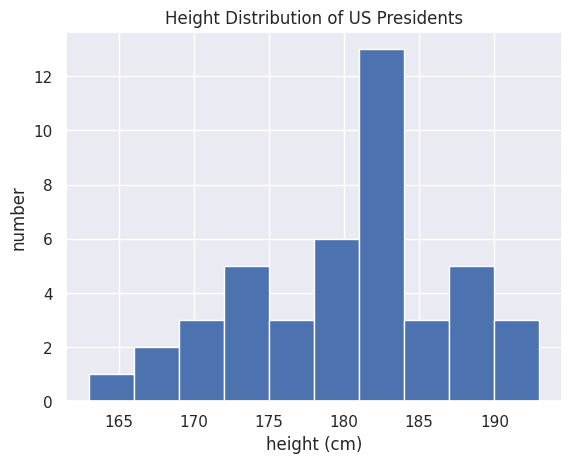

In [272]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Broadcasting

In [273]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting позволяет операции с массивами разной размерности. Например, мы легко можем добавить скалярную величину (представьте ее как массив с нулевой размерностью) к существующему массиву:

In [274]:
a + 5

array([5, 6, 7])

In [275]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [276]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Broadcasting как-бы дополняет одну матрицу до размерности другой, чтобы была возможность провести операцию.

![Broadcasting Visual](notebooks/figures/02.05-broadcasting.png)

### Правила broadcasting

Broadcasting в NumPy следует жесткому набору правил для определения порядка взаимодействия между двумя массивами:

    Правило 1: Если два массива различаются в размерности, форма массива с меньшей размерностью дополняется значениями его левой стороны.
    Правило 2: Если форма двух массивов различается в любых измерениях, массив с формой равной 1 в этом измерении, растягивается до измерения другого массива.
    Правило 3: Если по любому измерению размеры не совпадают и ни одно из измерений не равно 1, выбрасывается ошибка.

#### Пример 1

In [277]:
M = np.ones((2, 3))
a = np.arange(3)
print(M.shape)
print(a.shape)

(2, 3)
(3,)


In [278]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Пример 2

In [279]:
a = np.arange(3).reshape((3, 1))
print(a)
b = np.arange(3)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [280]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Пример 3

In [281]:
M = np.ones((3, 2))
print(M)
a = np.arange(3)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [282]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [ ]:
print(a.shape)
print(a[:, np.newaxis].shape)

In [ ]:
M + a[:, np.newaxis]

## Broadcasting на практике

Broadcasting является основой многих примеров из этой книги. Дальше приведены несколько операций в которых может быть полезен broadcasting.

### Центрирование массива

In [ ]:
X = np.random.random((10, 3))
print(X)

In [ ]:
Xmean = X.mean(0)
Xmean

In [ ]:
X_centered = X - Xmean
X_centered

In [ ]:
X_centered.mean(0)

### Отображение двумерной функции

Графическое отображение функции z = f(x, y)

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## Сравнения, маски и двоичная логика

### Пример: подсчёт дождливых дней

CSV файл содержит данные по дождливым дням в Сиэтле в 2014 году.

In [ ]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('notebooks_v1/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
rainfall.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

In [ ]:
plt.hist(rainfall, 40);

## Операторы сравнения как ufuncs

Результатом операций сравнения всегда является массив с элементами типа `bool`.

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
x < 3

In [ ]:
x > 3

In [ ]:
x != 3

In [ ]:
x == 3

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

In [ ]:
x < 6

## Работа с массивами с типом `bool`

In [ ]:
print(x)

### Подсчёт количества

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

Можно также использовать функцию `np.sum`. В этом случае `False` интерпретируется как 0, а `True` как 1.

In [ ]:
np.sum(x < 6)

Преимущество функции `np.sum` в том, что эта функция может осуществлять подсчёт вдоль рядов или колонок.

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

Если нам надо узнать все ли элементы равны `True` или только часть `True`, то можно использовать функции `np.all` и `np.any`.

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

In [ ]:
# are there any values less than zero?
np.any(x < 0)

In [ ]:
# are all values less than 10?
np.all(x < 10)

In [ ]:
# are all values equal to 6?
np.all(x == 6)

Функции `np.all` и `np.any` могут также использоваться для расчётов вдоль рядов или колонок.

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

Т.е. в этом массиве все элементы в первом и третьем ряду меньше 8, в то время как во втором ряду это не так.

### Логические операторы

В NumPy есть операторы битовой логики `&`, `|`, `^`, и `~`.

In [ ]:
# Найти количество дней когда уровень осадков был более 0.5 дюймов, но меньше чем 1 дюйм.
np.sum((inches > 0.5) & (inches < 1))

In [ ]:
print("Number days without rain:\t", np.sum(inches == 0))
print("Number days with rain:\t\t", np.sum(inches != 0))
print("Days with more than 0.5 inches:\t", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:\t", np.sum((inches > 0) & (inches < 0.2)))

## Двоичные массивы в качестве масок

Допустим мы хотим получить массив со значениями, которые меньше 5, для этого возьмём массив `x`:

In [ ]:
x = np.random.randint(10, size=(3, 4))
x

Мы можем легко получить двоичный массив с помощью оператора сравнения:

In [ ]:
x < 5

Чтобы получить из массива все значения меньше 5, мы можем просто провести индексирование на этом двоичном массиве; эта операция известна как _оператор маскирования_:

In [ ]:
x[x < 5]

В качестве результата возвращается одномерным массив, заполненные всеми значениями, которые удовлетворяют условию (x < 5). Другими словами, все значения на позициях которых двоичные маска-массив имеет значение `True`.

Таким образом мы получаем возможность обрабатывать данные так, как нам надо. Например, мы можем вычислить различные статистические данные для значение по Сиэттлу:

In [ ]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ", np.median(inches[rainy]))

print("Median precip on summer days in 2014 (inches):  ", np.median(inches[summer]))

print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))

print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

## Использование ключевых слов `and`/`or` или операторов `&`/`|`

Одна из частых точек для замешательства - это разница между ключевыми словами `and` и `or` с одной стороны, и операторами `&` и `|` с другой стороны.

Разница в том, что `and` и `or` определяют правду или лодь на основании всего объекта целиком, тогда как `&` и `|` работают с битами внутри каждого объекта.

Когда мы используем `and` или `or` - это как попросить Python обработать весь объект как одиночное булево значение. В Python, все ненулевые целые значения являются `True`. Таким образом:

In [ ]:
bool(42), bool(0)

In [ ]:
bool(42 and 0)

In [ ]:
bool(42 or 0)

Когда вы используете `&` и `|` на целочисленных значениях, выражение оперирует битами этого значения, применяя `and` или `or` к каждому биту, таким образом получая результат:

In [ ]:
bin(42)

In [ ]:
bin(59)

In [ ]:
bin(42 & 59)

In [ ]:
bin(42 | 59)

## Необычное индексирование

В отличие от доступа к элементам по скалярному индексу `x[5]`, необычное индексирование предполагает передачу целого массива индексов.

## Начала необычного индексирования

Необычное индексирование является концептуально простым: оно предполагает передачу массива индексов для доступа к множественным элементам исходного массива. Например:

In [ ]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

Допустим мы хотим получить три различных элемента этого массива:

In [ ]:
# традиционный подход
[x[3], x[7], x[4]]

In [ ]:
# необычное индексирование
ind = [3, 7, 4]
x[ind]

При использовании необычного индексирования, форма результата отражает форму массива индексов, а не исходного массива:

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
# массив `x` является одномерным, однако результат получается двумерным
x[ind]

Необычное индексирование работает также для многомерных массивов:

In [ ]:
X = np.arange(12).reshape((3, 4))
X

Также как и в обычном индексировании, первый индекс соответствует ряду, второй - колонке:

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

В данном премере получается, что первое значение равно `X[0,2]` (2), второе `X[1,1]` (5) и третье `X[2,3]` (11).

## Комбинированное индексирование

Для получение более мощных операций, необычное индексирование может быть скомбинировано с другими схемами индексирование, которые мы встречали раньше:

In [ ]:
print(X)

Из массива `X` извлечь элементы с индексами (2,2), (2,0) и (2,1):

In [ ]:
X[2, [2, 0, 1]]

Необычное индексирование может быть скомбинировано со срезами. Извлечь все данные из всех рядов, начиная с 1, для колонок 2, 0 и 1. Т.е. следующее выражение эквивалентно извлечениям: `X[1:, 2]`, `X[1:, 0]` и `X[1:, 1]`:

In [ ]:
X[1:, [2, 0, 1]]

Также необычное индексирование может быть использовано совместно с маскированием:

# ЧТО ТУТ КОНКРЕТНО ПРОИСХОДИТ?

In [ ]:
mask = np.array([1, 0, 1, 0], dtype=bool)
print(f"{row=}")
print("Reshaped `row`:", row[: ,np.newaxis])
X[row[:, np.newaxis], mask]

## Пример: выбор произвольных точек

Одно из частых применение необычного индексирования заключается в извлечении подмножества рядом из матрицы. Например, мы имеет матрицу _N_ на _D_, представляющую _N_ точек в _D_ измерениях, такую как следующие точки, отрисованные из двумерного нормального распределения:

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Давайте попробуем использовать необычное индексирование для выбора 20 произвольных точек. Мы сделаем это путем выбора 20 произвольных неповторяющихся индексов и используем эти индексы для выбора части из исходного массива:

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

In [ ]:
selection = X[indices]  # fancy indexing here
selection.shape

Для отображения выбранных точек давайте нарисуем большие круги вокруг этих выбранных точек:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], s=200, alpha=0.1, edgecolors='red');

## Изменение значений с помощью необычного индексирования

Необычное индексирование может использоваться как для извлечения элементов массива, так и для их изменения.

В этом примере индексам `[0,0]`, т.е. первому элементу массива присваиваются значения массива `[4,6]`, т.е. первому элементу массива сначала присваивается `4`, а потом `6`, поэтому первый элемент равен `6`, а остальные остались неизменными:

In [ ]:
x = np.zeros(10)
print("Before", x)
x[[0, 0]] = [4, 6]
print("After", x)

Далее идёт совсем не интуитивный пример:

In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

Для увеличения определенных индексов на определённую величину лучше использовать следующий подход:

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

## Пример: группировка данных

Вы можете использовать эти идеи для эффективной группировки данных для создания гистограммы. Например, представьте, что мы имеет 1000 значений и хотели бы быстро найти в какие группы они попадают. Мы можем вычислить это с помощью `ufunc.at`:

In [ ]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

In [ ]:
# plot the results
plt.plot(bins, counts, ds='steps');

In [ ]:
# тоже самое, но через специальную функцию `hist`, которая используется для построения гистограмм.
plt.hist(x, bins, histtype='step');

# Сортировка массивов

In [ ]:
# возвратить отсортированный (quicksort) массив не изменяя исходного массива
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [ ]:
# сортировка исходного массива с заменой значений (in-place сортировка)
x.sort()
print(x)

In [ ]:
# `argsort` возвращает индексы отсортированных элементов
# первый индекс - это индекс наименьшего элемента, и т.д.
x = np.array([20, 10, 40, 30, 50])
i = np.argsort(x)
print(i)

## Сортировка по рядам и колонкам

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

In [ ]:
# отсортировать каждую колонку массива X
np.sort(X, axis=0)
# ЗНАЧЕНИЯ В РЯДАХ ИЗМЕНЯЮТСЯ!!!
# например, был ряд `[2 6 7 4 3 7]`, но теперь такого ряда нет вообще!

In [ ]:
# отсортировать каждый ряд массива X
np.sort(X, axis=1)
# ЗНАЧЕНИЯ В КОЛОНКАХ ИЗМЕНЯЮТСЯ!

## Частичные сортировки: Секционирование

Иногда нам не нужно сортировать весь массив целиком, а просто мы хотим найти `k` наименьших значений в массиве. NumPy предлагает такую возможность с функцией `np.partition`. Функция `np.partition` принимает массив и число _K_ (сколько наименьших значений надо найти); результатом является новый массив с наименьшими значениями в количестве _K_ слева и оставшимися значениями справа, **порядок произвольный**:

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)
# _K_ = 3, соответсвенно `np.partition` найдёт 3 минимальных значения массива

In [ ]:
print(X)
# в каждом ряду первые 2 значения будут наименьшими из данного ряда
np.partition(X, 2, axis=1)

## Пример: k-ближайших соседей

Давайте быстро посмотрим как мы можем использовать функцию `argsort` вдоль множественных осей для поиска ближайших соседей каждой точки в наборе. Мы начнём с создания произвольного набора из 10 точек в декартовых координатах. Согласно стандартному подходу, мы представим эти точки в массиве 10×2:

In [284]:
X = rand.rand(10, 2)*10
X

array([[7.68554014, 0.43603772],
       [9.94550511, 4.69944514],
       [2.79560342, 8.83494022],
       [7.47718774, 9.53071847],
       [3.30750305, 5.52764967],
       [5.72292469, 9.80331584],
       [0.75346256, 3.05697019],
       [1.90911031, 2.68474857],
       [4.85279874, 3.72686867],
       [3.94691467, 8.44213141]])

Давайте посмотрим как они выглядят:

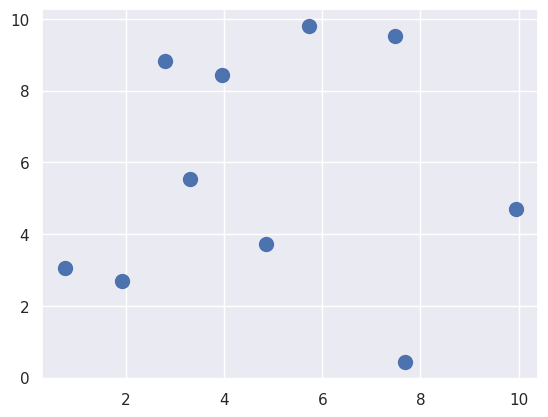

In [285]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Теперь мы вычисли "расстояние" между каждой парой точек. Это квадратичное расстояние?

In [286]:
q = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

Та же операция разбитая на шаги:

In [287]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [288]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [289]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Чтобы убедиться, что мы всё делаем правильно, мы должны увидеть, что диагональ матрицы (т.е. набор расстояние между каждой точкой и самим собой) все равны 0:

In [290]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Теперь можно использовать `np.argsort` для сортировки вдоль каждого ряда. Самая левая колонка даст нам индексы ближайших соседей:

In [291]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 8 1 7 4 6 9 3 5 2]
 [1 0 8 3 5 4 9 2 7 6]
 [2 9 5 4 3 8 6 7 1 0]
 [3 5 9 2 1 4 8 7 0 6]
 [4 8 9 7 2 6 5 3 1 0]
 [5 3 9 2 4 8 1 7 6 0]
 [6 7 4 8 2 9 0 5 3 1]
 [7 6 8 4 9 0 2 5 1 3]
 [8 4 7 6 0 9 1 2 5 3]
 [9 2 5 4 3 8 7 6 1 0]]


Но использование сортировки в данном случае является избыточным. Если нам просто нужны _k_ ближайших соседей, то всё что нам нужно - это секционировать каждый ряд таким образом, что наименьшие _k+1_ значений будут первыми, а более дальние точки будут заполнять оставшиеся позиции массива. Мы можем сделать это с помощью функции `np.argpartition`:

In [292]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

Для визуализации этой сети ближайших, давайти быстро нарисуем точки с линиями, представляющими связи между каждой точкой и ее ближайшим соседом:

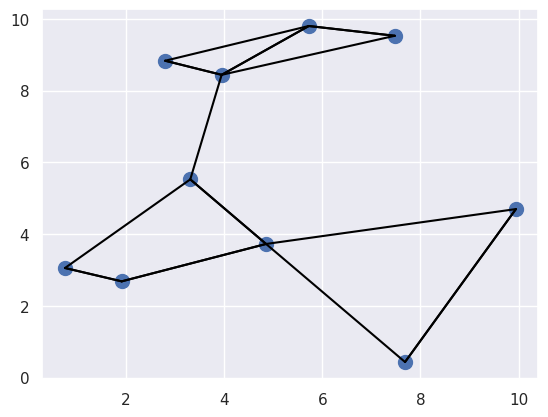

In [293]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

# Структурированные данные: структурированные массивы NumPy

Достаточно часто наши данные могут быть отлично представлены в виде гомогенных массивов значений, однако иногда это не является приемлемым.
Текущая секция демонстрирует использование стуктурированных массивов NumPy и записей массивов (record arrays?), которые предлагают эффективное хранения для комплексных гетерогенных данных. В то время как шаблоны, показанные в этой секции, могут быть достаточно полезными для простых операций, однако подобные сценарии выглядят более подходящими для использования в фреймах данных Pandas.

In [294]:
import numpy as np

Представьте, что у нас есть несколько категорий данных по целому набору людей (например, имя, возраст и вес), и мы бы хотели сохранить эти значения для использования в Python-программе. Возможно сохранить их в разных массивах. Но это будет неудобно, не существует ничего, что бы подсказало нам, что эти массивы как-то связаны; было бы более естественно если бы мы могли использовать единую структуру для сохранения всех этих данных. NumPy может хранить подобные данные с помощью структурированных массивов, которые являются массивами для составных данных.

In [298]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

Мы можем создать стуктуру с составными данными через использование спецификации типа составных данных:

In [295]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


Здесь:

* `U10` читается как  "Unicode string of maximum length 10";
* `i4` читается как "4-byte (i.e., 32 bit) целое число"
* `f8` читается как  "8-byte (i.e., 64 bit) число с плавающей точкой"

In [299]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


В структурированных массивах можно обращаться к данным через ключевые слова:

In [301]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [302]:
# Get first row of data
data[0]

('Alice', 25, 55.)

In [303]:
# Get the name from the last row
data[-1]['name']

'Doug'

In [305]:
# Получить второе имя
data['name'][1]

'Bob'

С использованием булевых масок мы можем делать достаточно сложные операции, например найти всех до 30 лет:

In [312]:
# Найти все имена людей моложе 30 лет
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

## Создание структурированных массивов

In [314]:
# Возможно использование встроенных типов Python
np.dtype({'names':('name', 'age', 'weight'), 'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [315]:
# Или названия полей и типы можно указать через кортежи
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [317]:
# Если имена типов не имеют значение, вы можете указать только типы:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

## Более сложные составные типы

Можно задать еще более сложные составные типы, чем рассмотренне выше. Например, вы можете создать тип, где каждый элемент содержит массив или матрицу значений. Здесь мы создаём тип данных с компонентом `mat` состоящим из 3×3 матрицы из элементов с плавающей запятой:

In [323]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## RecordArrays: структурированные массивы с изюминкой

Отличие от обычных стуктурированных массивов состоит в том, что доступ к элементам может быть обеспечен через имена, а не через ключи.

In [327]:
# обычный структурированный массив
data['age']

array([25, 45, 37, 19], dtype=int32)

In [328]:
# recordarray
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

Минусом такого подхода является некоторая потеря производительности.